# 数据处理
## 加载数据

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

%matplotlib qt5

In [2]:
sample_data_raw_file = os.path.join( 'data', 'BCICIV_2a_gdf','A01T.gdf')
raw = mne.io.read_raw_gdf(sample_data_raw_file,preload=True)
print(raw)

Extracting EDF parameters from D:\BCIC\paper\project\Myself\data\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


D:\Anaconda\envs\tensorflow_gpu\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
D:\Anaconda\envs\tensorflow_gpu\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>


打印raw中的信息

In [3]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output

the (cropped) sample data object has 672528 time samples and 25 channels.
The last time sample is at 2690.108 seconds.
The first few channel names are EEG-Fz, EEG-0, EEG-1.



In [4]:
# some examples of raw.info:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

print(raw.info)

bad channels: []
250.0 Hz
None 

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


## 复制数据
为了不改变原始数据，我们将数据复制到original_raw中，在original_raw对数据进行操作。

In [5]:
original_raw = raw.copy()  # 复制数据
raw.apply_hilbert()
print(f'original data type was {original_raw.get_data().dtype}, after '
      f'apply_hilbert the data type changed to {raw.get_data().dtype}.')

original data type was float64, after apply_hilbert the data type changed to complex128.


Using matplotlib as 2D backend.
Opening raw-browser...


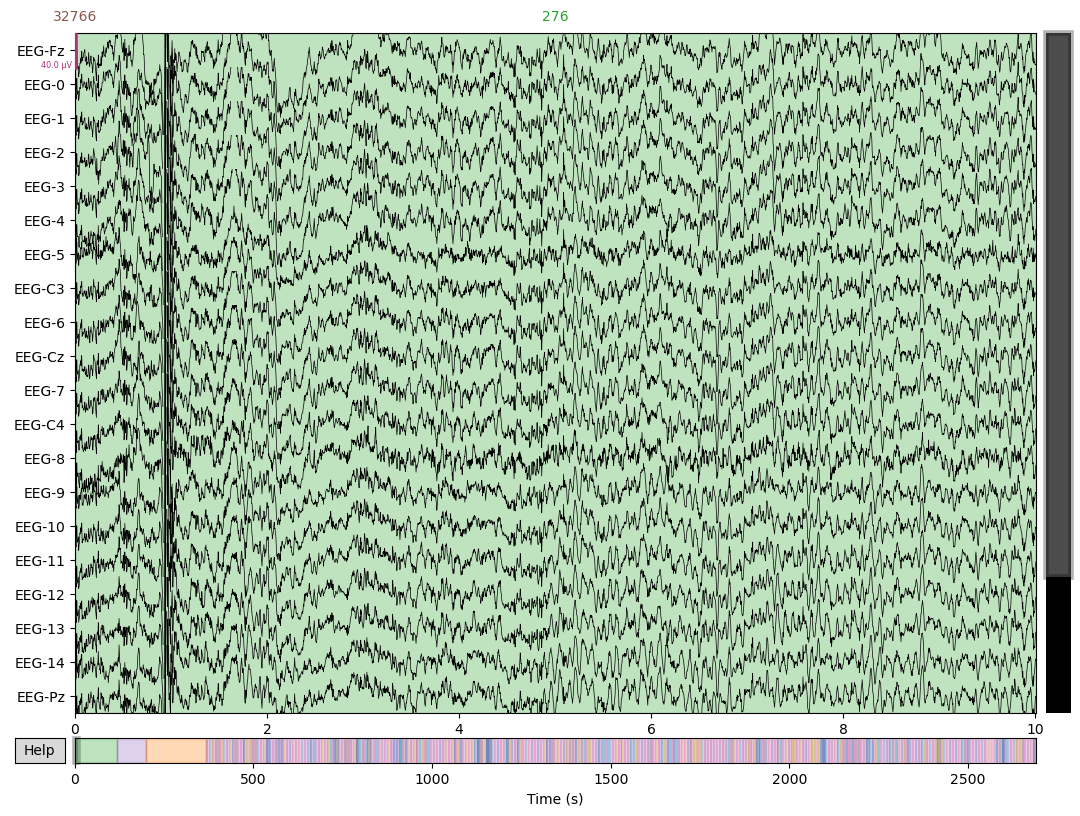

In [6]:
original_raw.plot()

In [7]:
print(original_raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


## 更改通道类型
在gdf文件中并没有将EEG与EOG进行分类，所以我们要把涉及EOG的脑电设置为EOG类。

In [8]:
# 更改通道类型
original_raw.set_channel_types({'EOG-left': 'eog'})
original_raw.set_channel_types({'EOG-central': 'eog'})
original_raw.set_channel_types({'EOG-right': 'eog'})
print(original_raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 22 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


## 电极定位

### 更改通道名称
10-20电极名称：['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'O9', 'Iz', 'O10', 'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2']

In [9]:
print(original_raw.ch_names)
original_raw.rename_channels({'EEG-Fz': 'Fz'})
original_raw.rename_channels({'EEG-0': 'FC3'})
original_raw.rename_channels({'EEG-1': 'FC1'})
original_raw.rename_channels({'EEG-2': 'FCz'})
original_raw.rename_channels({'EEG-3': 'FC2'})
original_raw.rename_channels({'EEG-4': 'FC4'})
original_raw.rename_channels({'EEG-5': 'C5'})
original_raw.rename_channels({'EEG-C3': 'C3'})
original_raw.rename_channels({'EEG-6': 'C1'})
original_raw.rename_channels({'EEG-Cz': 'Cz'})
original_raw.rename_channels({'EEG-7': 'C2'})
original_raw.rename_channels({'EEG-C4': 'C4'})
original_raw.rename_channels({'EEG-8': 'C6'})
original_raw.rename_channels({'EEG-9': 'CP3'})
original_raw.rename_channels({'EEG-10': 'CP1'})
original_raw.rename_channels({'EEG-11': 'CPz'})
original_raw.rename_channels({'EEG-12': 'CP2'})
original_raw.rename_channels({'EEG-13': 'CP4'})
original_raw.rename_channels({'EEG-14': 'P1'})
original_raw.rename_channels({'EEG-Pz': 'Pz'})
original_raw.rename_channels({'EEG-15': 'P2'})
original_raw.rename_channels({'EEG-16': 'POz'})
print(original_raw.ch_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz', 'EOG-left', 'EOG-central', 'EOG-right']


In [10]:
montage = mne.channels.make_standard_montage('standard_1020')
print(montage)
original_raw.set_montage(montage, match_case=False,on_missing='warn')

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

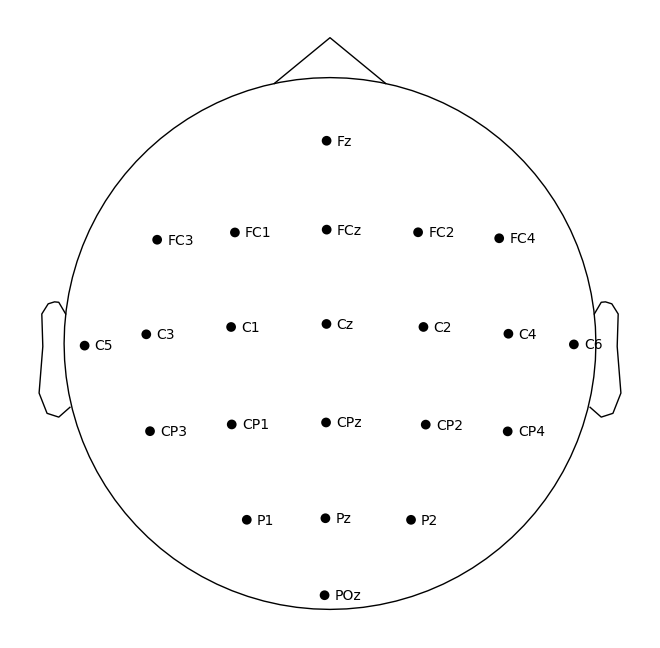

In [11]:
# 电极位置图
original_raw.plot_sensors(ch_type='eeg', show_names=True,sphere=(0, 0.02, 0.01, 0.066))

## 剔除无用电极
BCI竞赛数据中没有无用电极，故该内容省略

## 重参考

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Opening raw-browser...


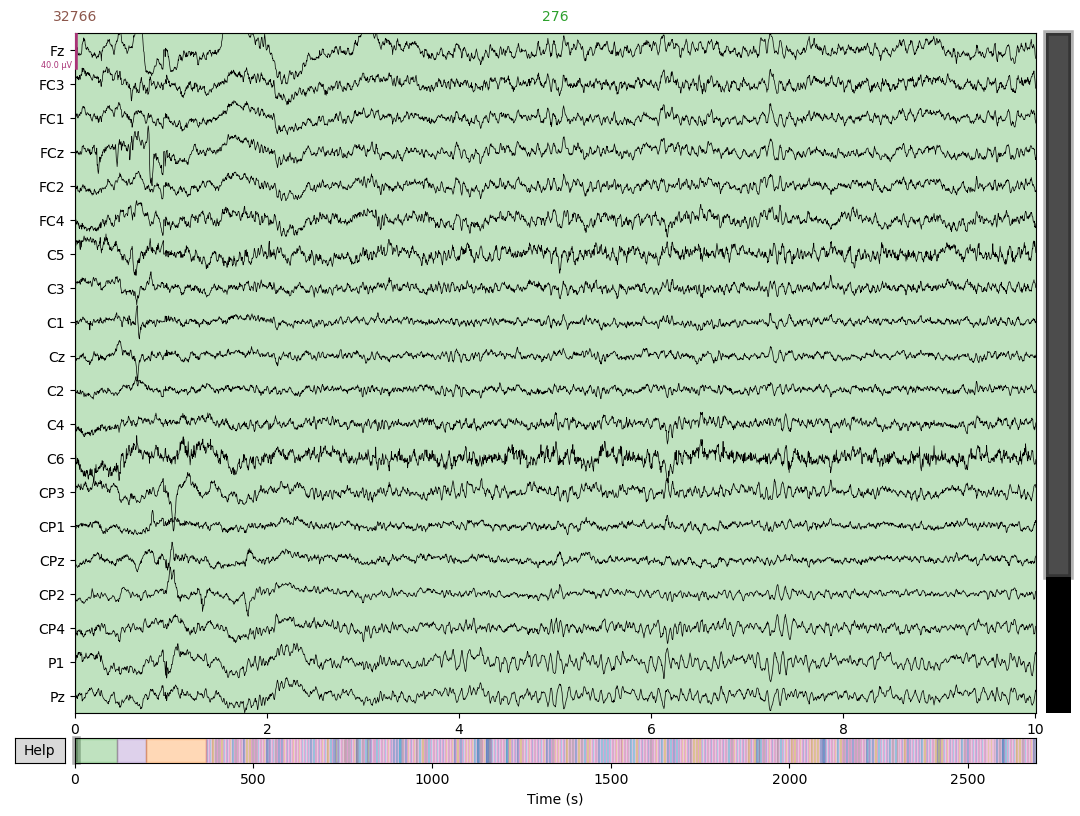

In [12]:
# use the average of all channels as reference
raw_avg_ref = original_raw.set_eeg_reference(ref_channels='average')
raw_avg_ref.plot()

## 带通滤波

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 sec)

Effective window size : 8.192 (s)


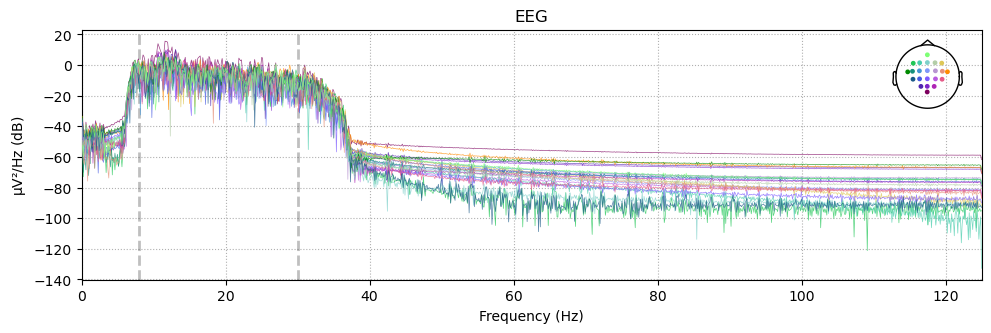

In [13]:
original_raw.filter(8., 30., fir_design='firwin')
original_raw.plot_psd(area_mode='range', tmax=10.0,  average=False)

In [14]:
print(original_raw.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG
 custom_ref_applied: True
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 8.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


## 分段与基线校正（保存数据）

### 提取original_raw中事件

In [15]:
events, _ = mne.events_from_annotations(original_raw)
picks = mne.pick_types(original_raw.info, meg=False, eeg=True, eog=False, stim=False, exclude='bads')
tmin, tmax = 1., 4.
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


### 分段并进行基线校正

In [16]:
event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})
epochs = mne.Epochs(original_raw, events,event_id, tmin, tmax, proj=True, picks=picks,baseline=(tmin, tmax), preload=True, on_missing='warn')

Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


In [17]:
# 查看事件
print(np.unique(events[:,2], return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 15,   1,   1,   1,   9, 288,  72,  72,  72,  72], dtype=int64))


Opening epochs-browser...


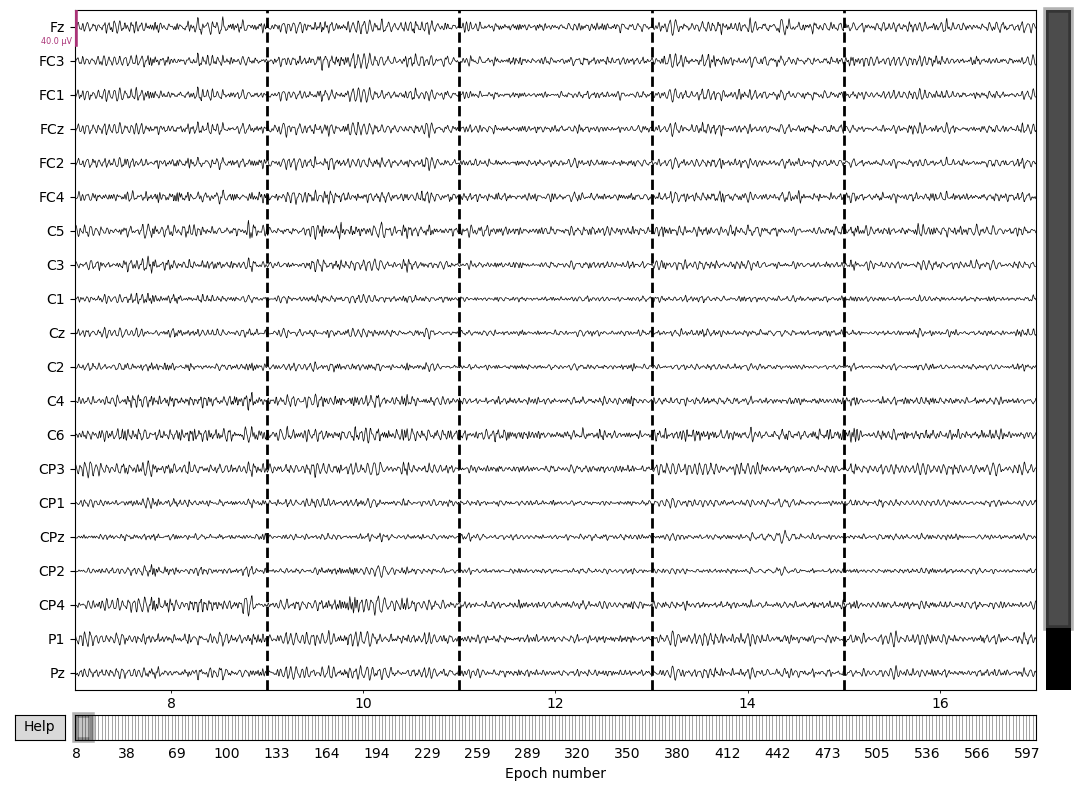

In [18]:
epochs.plot(n_epochs=5)

## 插值坏导与剔除坏段


## ICA

In [19]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=22, random_state=97, max_iter='auto')
ica.fit(epochs)

ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(epochs)

Fitting ICA to data using 22 channels (please be patient, this may take a while)


C:\Users\Mr.shen\AppData\Local\Temp\ipykernel_16796\1525763833.py:3: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Selecting by number: 22 components
Fitting ICA took 19.3s.


C:\Users\Mr.shen\AppData\Local\Temp\ipykernel_16796\1525763833.py:3: RuntimeWarning: Using n_components=22 (resulting in n_components_=22) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(epochs)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

Opening epochs-browser...


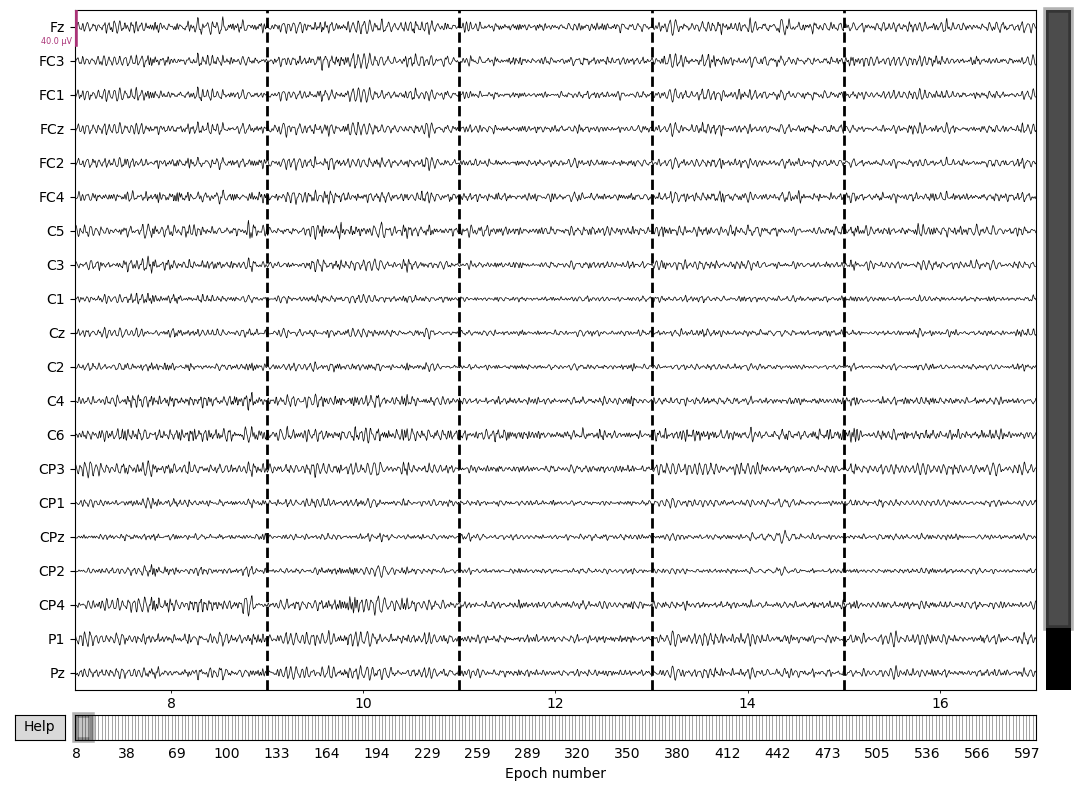

In [20]:
epochs.plot(n_epochs=5)

In [21]:
from time import time
from mne.preprocessing import ICA

def run_ica(method, fit_params=None):
    ica = ICA(n_components=22, method=method, fit_params=fit_params,
              max_iter='auto', random_state=0)
    t0 = time()
    ica.fit(original_raw)
    fit_time = time() - t0
    title = ('ICA decomposition using %s (took %.1fs)' % (method, fit_time))
    ica.plot_components(title=title)

In [22]:
run_ica('fastica')

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 22 components


C:\Users\Mr.shen\AppData\Local\Temp\ipykernel_16796\3272161239.py:8: RuntimeWarning: Using n_components=22 (resulting in n_components_=22) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (6.4e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(original_raw)


Fitting ICA took 72.3s.


In [23]:
def run_ica(method, fit_params=None):
    ica = ICA(n_components=22, method=method, fit_params=fit_params,
              max_iter='auto', random_state=0)
    t0 = time()
    ica.fit(epochs)
    fit_time = time() - t0
    title = ('ICA decomposition using %s (took %.1fs)' % (method, fit_time))
    ica.plot_components(title=title)

In [24]:
run_ica('fastica')

Fitting ICA to data using 22 channels (please be patient, this may take a while)


C:\Users\Mr.shen\AppData\Local\Temp\ipykernel_16796\4091916936.py:5: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Selecting by number: 22 components
Fitting ICA took 7.9s.


C:\Users\Mr.shen\AppData\Local\Temp\ipykernel_16796\4091916936.py:5: RuntimeWarning: Using n_components=22 (resulting in n_components_=22) may lead to an unstable mixing matrix estimation because the ratio between the largest (11) and smallest (1.7e-30) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 21
  ica.fit(epochs)
